In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d        # for 3d plot
import matplotlib.colors                # for changing color in contour plot
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error  # for evaluation 
from tqdm import tqdm_notebook                # for showing the time taken to run the code 

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(x,w,b):
  return (1/(1+np.exp(-(w*x+b))))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w=0.9
b=0.1
x=np.linspace(-10,10,100)
y=sigmoid(x,w,b)

In [5]:
type(x)

numpy.ndarray

In [6]:
type(y)   # python automatically broadcasting

numpy.ndarray

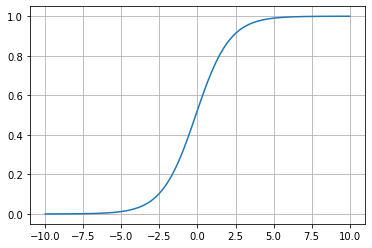

In [7]:
plt.plot(x,y)
plt.grid()
plt.show()

# slider in google colabe (form fields)

In [0]:
# changing value of w and b usnig google colabe slider option
w=-0.8     #@param {type: "slider", min: -2, max: 2,step:0.1} 
b=2        #@param {type: "slider", min: -2, max: 2,step:0.1}
x=np.linspace(-10,10,100)
y=sigmoid(x,w,b)

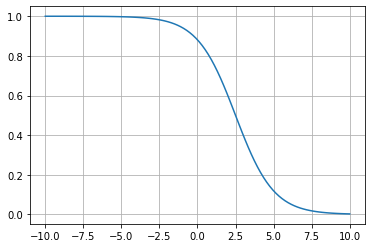

In [9]:
plt.plot(x,y)
plt.grid()
plt.show()

### with 2 attributes

$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [11]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

# 3d plot in matplot lib

In [0]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
xx1,xx2=np.meshgrid(x1,x2)     # broadcasting 1d arrays taking (x1,x2.T)->(1*100 and (1*100).T)->(1*100 and 100*1)->broadcasted

In [13]:
print(x1.shape,x2.shape,xx1.shape,xx2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1=0.5
w2=0.5
b=0
y=sigmoid_2d(xx1,xx2,w1,w2,b)

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"]) # color_map-range from min to max value for y

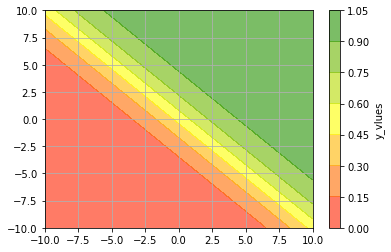

In [16]:
plt.contourf(xx1,xx2,y,cmap=my_cmap,alpha=0.6) #color map(cmap) based on y vlues  #alpha for transparency   # red shows it is 0 and green shows it is 1 
c_bar=plt.colorbar()
c_bar.set_label('y_vlues')
plt.grid()
plt.show()                

it is linear because the w values are same

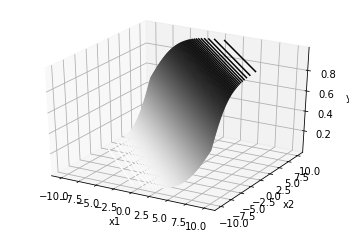

In [17]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(xx1,xx2,y,200,cmap='binary')        #200 is th dense resolution 
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

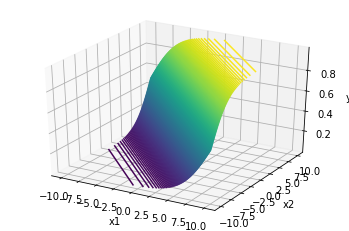

In [18]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(xx1,xx2,y,200,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

## ax.plot_surface

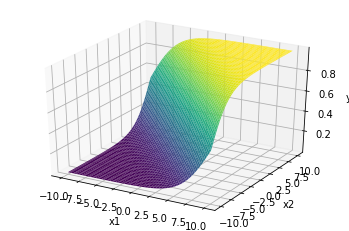

In [19]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

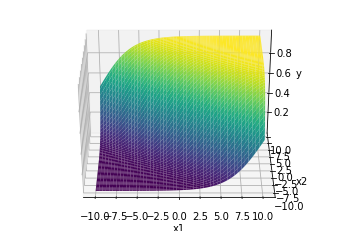

In [20]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,270)    # to rotate the graph (up and down , right or left)

when x1 is 0 its corresponding output will come very large up to a large down it takes a large cover. but when x2 is 10 it come from very large up and stops at a paticular position 

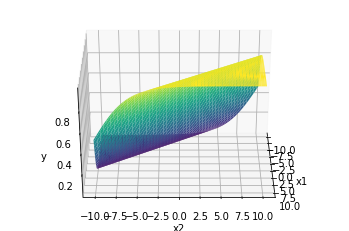

In [21]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,0)

### changing the weights

In [0]:
w1=0.5
w2=2
b=0
y=sigmoid_2d(xx1,xx2,w1,w2,b)

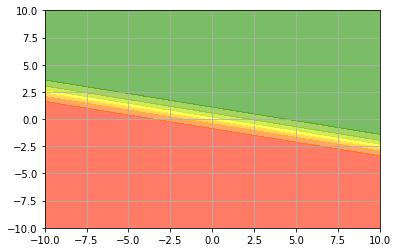

In [23]:
plt.contourf(xx1,xx2,y,cmap=my_cmap,alpha=0.6)      #alpha for transparency     # red shows it is 0 and green shows it is 1 
plt.grid()
plt.show()                

by maximising the weight the slope becomes more sharper

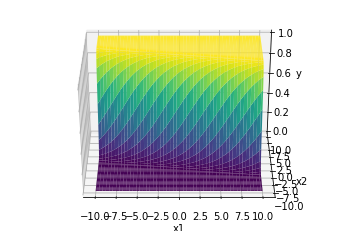

In [24]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,270)

now all the points in x1 comes from very large up and large down

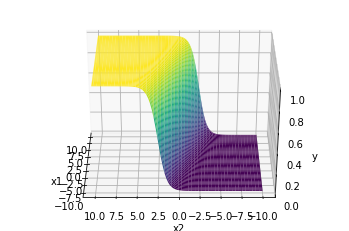

In [25]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(xx1,xx2,y,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,180)

when x1 is changing x2 has very solid influence on y
### This above plots represents given input what is the output y

#compute loss for a given dataset

In [0]:
w_unknown=0.5
b_unknown=0.25

x=np.random.random(25)*20-10   #scaling the random numbers (we want numbers between -10 and 10 so {total numbers - largest number})
y=sigmoid(x,w_unknown,b_unknown)   #just assuning this is to be a 'true y'

In [27]:
x[:5]      # checking first 5 values in x

array([-8.98986875, -3.54433404, -1.93128945,  8.05837231,  3.5729836 ])

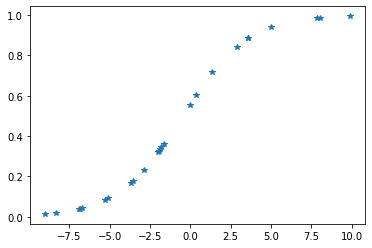

In [28]:
plt.plot(x,y,'*')
plt.show()

In [0]:
def calculate_loss(x,y,w_est,b_est):
  loss=0
  for i,j in zip(x,y):
    loss+=(j-sigmoid(i,w_est,b_est))**2
  return loss

In [0]:
w=np.linspace(-1,1,100)  # creating array of w 
b=np.linspace(-1,1,100)  # creating array of b

ww, bb=np.meshgrid(w,b)  # broadcasting (w,b.T) for ploting 

loss=np.zeros(ww.shape)  #initialising loss with zeros of shape ww or bb (as both are broadcasted)

In [31]:
ww.shape

(100, 100)

In [0]:
for i in range(ww.shape[0]):     #row shape #can also use bb.shape(as both are broadcasted)
  for j in range(ww.shape[1]):   #column shape
    loss[i,j]=calculate_loss(x,y,ww[i,j],bb[i,j])    # for different values of w,b(i,j) loss(i,j) is computed

In [33]:
loss.shape

(100, 100)

Text(0.5, 0, 'loss')

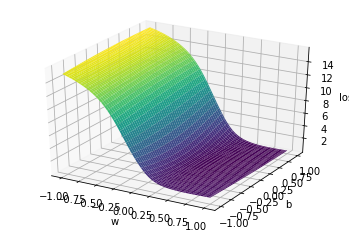

In [34]:
# now comparing w and b with loss(coloured)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(ww,bb,loss,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

#ax.view_init(30,180)

from the above graph when w is -ve the loss i very high 

we dont need that w value of high loss, 
So we refine the range of w

In [0]:
w=np.linspace(0,1,101)     # for some accuracy of finding the  w and b values we make 100 instead of 100
b=np.linspace(-1,1,101)    # for some accuracy of finding the  w and b values we make 100 instead of 100

ww, bb=np.meshgrid(w,b)

loss=np.zeros(ww.shape)

for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    loss[i,j]=calculate_loss(x,y,ww[i,j],bb[i,j])    # calculate_loss function is defined above

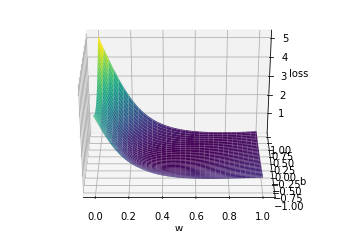

In [36]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(ww,bb,loss,cmap='viridis')        #binary - black and white, viridis - color
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30,270)

### finding the value of w and b for minimum loss

In [0]:
ij=np.argmin(loss)                # the position of number which is minimum in this array
i=int(np.floor(ij/loss.shape[1]))  # as loss is two dimentional we have to manually compute the coordinates (divide by columns) to get row
j=int(ij-i*loss.shape[1])          # to get column

In [38]:
print(ij,i,j)

6312 62 50


In [39]:
print(ww[i,j],bb[i,j]) # thus we get the w and b which are used to compute true y as above(w_unknown and b_unknown)

0.5 0.24


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None                               
    self.b=None
  def perceptron(self,x):                        #perceptron---> because sigmoid have 1/(1+e^-(perceptron))
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):                           #sigmoid function
    return 1.0/(1.0+np.exp(-x)) 

  def grad_w(self,x,y):                          #gradient of w  del(w)  #for w=w+del_w 
    y_pred=self.sigmoid(self.perceptron(x))
    return(y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):                          #gradient of b  del(b)  #for b=b+del_b 
    y_pred=self.sigmoid(self.perceptron(x))
    return(y_pred-y)*y_pred*(1-y_pred)

  def fit(self,x,y,epochs=1,learning_rate=1,initialise=True):     # learning algorithm of sigmoid  # refer sigmoid notes for clarity
    #initialise w, b
    if initialise:
      self.w=np.random.randn(1,x.shape[1])               # since w is a vector which should be in the shape of x
      self.b=0                                           # since b is a scalar

    for i in range(epochs):
      dw=0
      db=0
      for i,j in zip(x,y):                       # gradient is found for all values present x and y vectors          
        dw += self.grad_w(i,j)
        db += self.grad_b(i,j)
      self.w -= learning_rate*dw                 # learning rate is multiplied for w(vector) and b(scalar)
      self.b -= learning_rate*db

# Fit for toy data

In [0]:
x=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])      # toy dataset
y=[1,1,1,0,0,0]                                                      

In [0]:
sn=SigmoidNeuron()
sn.fit(x,y,1,0.25,True)

In [0]:
def plot_sn(x,y,sn,ax):                            #for ploting
  x1=np.linspace(-10,10,100)                       # for creating the sigmoid (contourf)
  x2=np.linspace(-10,10,100)
  xx1,xx2=np.meshgrid(x1,x2)
  yy=np.zeros(xx1.shape)
  for i in range(x2.size):
    for j in range(x1.size):
      val=np.asarray([x1[j],x2[i]])
      yy[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(xx1,xx2,yy,cmap=my_cmap,alpha=0.6)  #x axis->xx1 y axis->xx2 color based on values in yy, costom colors using cmap, alpha->invisibilty
  ax.scatter(x[:,0],x[:,1],c=y,cmap=my_cmap)     # taking color based on numbers in y # and using cmap which is used for contourf plot 
  plt.grid()
  plt.plot()

[[-0.47234079  0.98034741]] [0.00135632]
[[-0.24003224  0.91887291]] [0.0143165]
[[0.14005781 0.7656703 ]] [0.02743478]
[[0.6566551  0.48039762]] [0.03933768]
[[0.77976337 0.09038633]] [0.07526517]
[[ 0.80287163 -0.38245082]] [0.04600979]
[[ 0.96907657 -0.21524366]] [-0.01436989]
[[ 0.9884032  -0.42857684]] [-0.08097341]
[[ 1.11698268 -0.29051558]] [-0.1315526]
[[ 1.13547917 -0.43915302]] [-0.18598564]
[[ 1.22336865 -0.36507237]] [-0.22782356]
[[ 1.25275592 -0.43852008]] [-0.27017047]
[[ 1.30870118 -0.42132267]] [-0.30543637]
[[ 1.34466978 -0.44904877]] [-0.33925003]
[[ 1.38466097 -0.45561779]] [-0.36962612]
[[ 1.41938452 -0.46875998]] [-0.39799849]
[[ 1.45258282 -0.47893644]] [-0.42426506]
[[ 1.48355107 -0.48898816]] [-0.44877241]
[[ 1.51273818 -0.49836031]] [-0.47169252]
[[ 1.54029716 -0.50722343]] [-0.49319954]
[[ 1.56639649 -0.51561669]] [-0.51343851]
[[ 1.5911766 -0.5235864]] [-0.53253524]
[[ 1.6147594  -0.53117173]] [-0.55059891]
[[ 1.63725107 -0.53840681]] [-0.56772471]
[[ 1.658

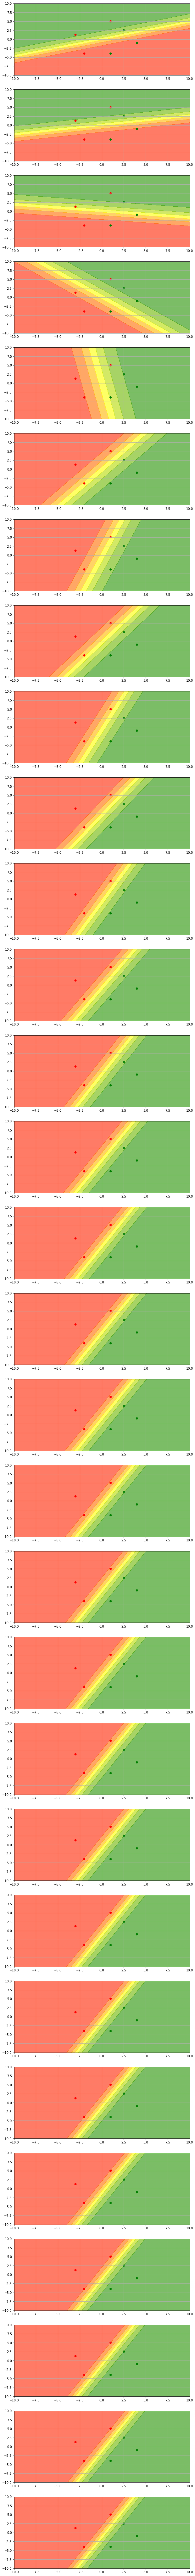

In [44]:
sn.fit(x,y,1,0.05,True)    # first we run with initialise to set random values for w initially
N=30                                         #number of plots needed and how many time to train 
plt.figure(figsize=(10,N*5))                 #fixing the figure with size
for i in range(N):
  print(sn.w,sn.b)
  ax=plt.subplot(N,1,i+1)                    # creating subplots (number of rows, number of columns, current ploting axis)
  plot_sn(x,y,sn,ax)
  sn.fit(x,y,1,0.5,False)

In [45]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

## real data set

In [51]:
!ls

mobile_cleaned.csv  sample_data


In [0]:
data=pd.read_csv("mobile_cleaned.csv")

In [53]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [54]:
data.shape

(341, 88)

In [0]:
x=data.drop('Rating',axis=1)
y=data['Rating']

In [57]:
y.head()

0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64

In [0]:
y=data['Rating'].values  #converting into numpy array

In [59]:
y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold=4.2
data['Class']=(data['Rating']>=threshold)

In [77]:
data['Class'].head()

0    True
1    True
2    True
3    True
4    True
Name: Class, dtype: bool

In [0]:
data['Class']=(data['Rating']>=threshold).astype(np.int)

In [79]:
data['Class'].head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [80]:
data['Class'].value_counts(normalize='True')

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
y_binarised=data['Class'].values

## Standardising the data

$z_i=\frac{x_i-\mu}{s}$ where $\mu$ is mean and s is standard deviation

In [0]:
from sklearn.preprocessing import StandardScaler        #sklean module for standardising

In [0]:
R=np.random.random([100,1]) #taking an example for standardising

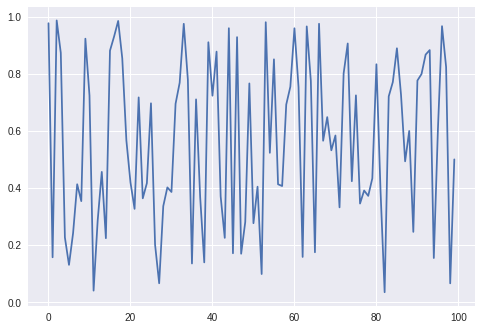

In [88]:
plt.plot(R)
plt.style.use('seaborn')
plt.show()

In [89]:
np.mean(R)

0.5589706046223359

In [90]:
np.std(R)

0.2881573452547786

In [0]:
scalar=StandardScaler()

In [92]:
scalar.fit(R) # fitting R to the standardScalar

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
scalar.mean_   # the standardScalr mean should be equal to fitted data mean (R)

array([0.5589706])

In [0]:
R_T=scalar.transform(R)  # standardising

In [99]:
np.mean(R_T)        # which is very close to zero

-1.4127587988355117e-16

In [100]:
np.std(R_T)

1.0

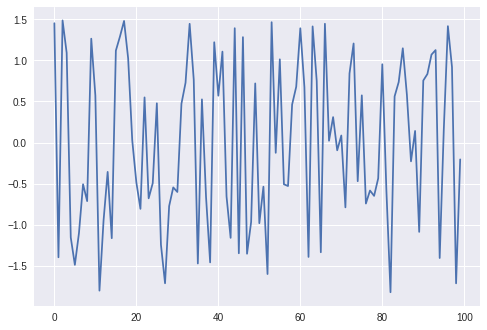

In [101]:
plt.plot(R_T)      # the plot will be similar to the data before standardising
plt.show() 

mean is 0 and SD is 1 hence the example data is standardised

# standardising the real data
before standardising we have to split the data into tran/test data

In [0]:
from sklearn.model_selection import train_test_split

we have x, y, y_binarised.

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, stratify=y_binarised) 

1.random state will make the same split every time you run the code

2.stratyfy the catogorical variable will ensure the number of 1s and 0s in x_train and y_train are roughly the same

In [123]:
print(x_train.shape,x_test.shape)

(255, 87) (86, 87)


1. we are allowed to standardise the train data by computing its mean and SD 
2. we are not allowed to standardise the test date by computing its mean and SD. we should use the mean and SD of the train data to standardise the test data
3. so that only we use a scalar in the above standardising examplt to fit over one data and to transfor other data over the data which is fitted to scalar 

In [0]:
scalar=StandardScaler()

In [0]:
x_scaled_train=scalar.fit_transform(x_train)     # we can fit and transfor on one go # "x_train is fitted to scalar"
x_scaled_test=scalar.transform(x_test)

In [133]:
x_scaled_test.mean()

6.304800309250619e-05

### for standardising the output(y)
1. if we standardise the y its mean will become 0 and std become 1
2. but the output of the sigmoid should be in the range of 0 to 1
3. so we have to scale the standardisation 
4. for that we have to use MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
minmax_scaler=MinMaxScaler()

In [0]:
y_scaled_train=minmax_scaler.fit_transform(y_train.reshape(-1,1))   # if the data have only one feature we have to reshape it(-1,1)

In [139]:
np.max(y_scaled_train)

1.0

In [140]:
np.min(y_scaled_train)

0.0

In [0]:
y_scaled_test=minmax_scaler.transform(y_test.reshape(-1,1))

### for classification we need to binarise the output 
1. we have to compute the threshold
2. we have computed the threshold above before standardising (which is 4.2)
3. now we use the same minmax_scalar to transform corresponding to fitted y_train data
4. but it takes only array as argument

In [0]:
scaled_threshold=minmax_scaler.transform(np.array([threshold]).reshape(-1,1))

from the np.array extracting the threshold value

In [0]:
scaled_threshold=list(scaled_threshold)[0][0]

In [147]:
scaled_threshold

0.6800000000000002

### binarisning

In [0]:
y_binarised_train=(y_scaled_train>scaled_threshold).astype(np.int).ravel()   # ravel() makes it as a single 1d array

In [155]:
y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [0]:
y_binarised_test=(y_scaled_test>scaled_threshold).astype(np.int).ravel()

In [157]:
y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Train on Real Data

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None                               
    self.b=None
  def perceptron(self,x):                        #perceptron---> because sigmoid have 1/(1+e^-(perceptron))
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):                           #sigmoid function
    return 1.0/(1.0+np.exp(-x)) 

  def grad_w(self,x,y):                          #gradient of w  del(w)  #for w=w+del_w 
    y_pred=self.sigmoid(self.perceptron(x))
    return(y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):                          #gradient of b  del(b)  #for b=b+del_b 
    y_pred=self.sigmoid(self.perceptron(x))
    return(y_pred-y)*y_pred*(1-y_pred)

  def fit(self,x,y,epochs=1,learning_rate=1,initialise=True,display_loss=False):     # learning algorithm of sigmoid  # refer sigmoid notes for clarity
    #initialise w, b
    if initialise:
      self.w=np.random.randn(1,x.shape[1])               # since w is a vector which should be in the shape of x
      self.b=0 
                                                # since b is a scalar
    if display_loss:                            # for loss plot
      loss={}

    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):   # tqdm_notebook shows the time(in output terminal) for each epoch to be completed 
      dw=0
      db=0
      for X,Y in zip(x,y):                       # gradient is found for all values present x and y vectors          
        dw += self.grad_w(X,Y)
        db += self.grad_b(X,Y)
      self.w -= learning_rate*dw                 # learning rate is multiplied for w(vector) and b(scalar)
      self.b -= learning_rate*db
      
      if display_loss:
        y_pred=self.sigmoid(self.perceptron(x))
        loss[i]=mean_squared_error(y_pred,y)
    if display_loss:                                  # for loss plot
      plt.plot(list(loss.values()))                   # plot is not calable for dict values so we convert it into list
      plt.xlabel('Epochs')
      plt.ylabel('mean squared error')

  def predict(self,x):                                 # for testing 
    y_pred=[]
    for i in x:
      yy_pred=self.sigmoid(self.perceptron(i))
      y_pred.append(yy_pred)
    return np.array(y_pred)

In [0]:
sn=SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


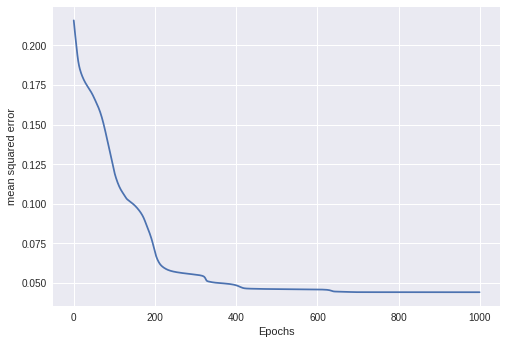

In [208]:
sn.fit(x_scaled_train,y_scaled_train,epochs=1000,learning_rate=0.01,display_loss=True)

#### this is one of the loss plot
1. there is some saturation over the cureve to avoid that change the hyper-parameters (lr and epochs)
2. by seeing this graph we have to tune the model with the hyper parameter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


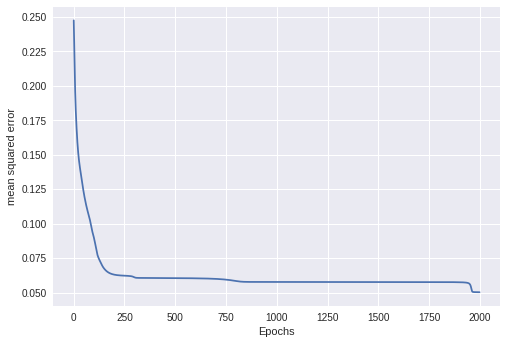

In [209]:
sn.fit(x_scaled_train,y_scaled_train,epochs=2000,learning_rate=0.015,display_loss=True)

In [0]:
y_pred_train=sn.predict(x_scaled_train)
y_pred_test=sn.predict(x_scaled_test)

In [0]:
y_pred_binarised_train=(y_pred_train>scaled_threshold).astype('int').ravel()   #binarising the predicted y for classification (accuracy test)
y_pred_binarised_test=(y_pred_test>scaled_threshold).astype('int').ravel()

## Acuracy test

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_train=accuracy_score(y_pred_binarised_train,y_binarised_train)
accuracy_test=accuracy_score(y_pred_binarised_test,y_binarised_test)

In [193]:
print(accuracy_train,accuracy_test)

0.8196078431372549 0.7790697674418605
